In [2]:
%matplotlib inline

from PIL import Image
from matplotlib.pyplot import imshow
from torchvision import models, transforms
from torch.autograd import Variable
from torch.nn import functional as F
from torch import topk
import numpy as np
import skimage.transform

def pil_loader(path):
    with open(path, 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB')

image_size = 1000
        
preprocess = transforms.Compose([
        transforms.Resize(image_size),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


display_transform = transforms.Compose([
    transforms.Resize((image_size,image_size))
    ])

class SaveFeatures():
    features=None
    def __init__(self, m): self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output): self.features = ((output.cpu()).data).numpy()
    def remove(self): self.hook.remove()

def getCAM(feature_conv, weight_fc, class_idx):
    _, nc, h, w = feature_conv.shape
    cam = weight_fc[class_idx].dot(feature_conv.reshape((nc, h*w)))
    cam = cam.reshape(h, w)
    cam = cam - np.min(cam)
    cam_img = cam / np.max(cam)
    return [cam_img]

def getHeatmap(imagepath):
    img = pil_loader(imagepath)
    #imshow(img)
    tensor = preprocess(img)
    prediction_var = Variable((tensor.unsqueeze(0)).cpu(), requires_grad=True)
    model.eval()
    final_layer = model._modules.get('layer4')
    activated_features = SaveFeatures(final_layer)
    prediction = model(prediction_var)
    pred_probabilities = F.softmax(prediction).data.squeeze()
    activated_features.remove()
    
    print(topk(pred_probabilities,1))
    
    weight_softmax_params = list(model._modules.get('fc').parameters())
    weight_softmax = np.squeeze(weight_softmax_params[0].cpu().data.numpy())
    class_idx = topk(pred_probabilities,1)[1].int()
    overlay = getCAM(activated_features.features, weight_softmax, class_idx )
    imshow(overlay[0], alpha=0.5, cmap='jet')
    imshow(display_transform(img))
    imshow(skimage.transform.resize(overlay[0], tensor.shape[1:3]), alpha=0.5, cmap='jet');
    
    

In [3]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, 9)

model = model.to(device)

model.load_state_dict(torch.load("resnet-test-model2.pth", map_location=torch.device('cpu')))

<All keys matched successfully>

/var/folders/9b/vyr22bts0rqclv5wy45xy0lc0000gn/T/ipykernel_43478/772648939.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


torch.return_types.topk(
values=tensor([0.9999]),
indices=tensor([1]))


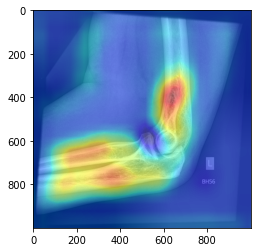

In [170]:
getHeatmap("elbowtest.png")

/var/folders/9b/vyr22bts0rqclv5wy45xy0lc0000gn/T/ipykernel_43478/772648939.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


torch.return_types.topk(
values=tensor([0.8036]),
indices=tensor([0]))


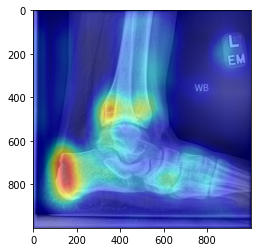

In [171]:
getHeatmap("ankletest.png")

/var/folders/9b/vyr22bts0rqclv5wy45xy0lc0000gn/T/ipykernel_43478/772648939.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


torch.return_types.topk(
values=tensor([1.0000]),
indices=tensor([7]))


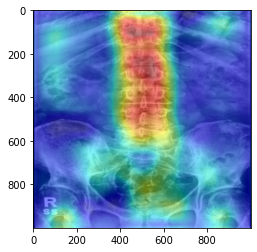

In [172]:
getHeatmap("spinetest.png")

/var/folders/9b/vyr22bts0rqclv5wy45xy0lc0000gn/T/ipykernel_43478/772648939.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


torch.return_types.topk(
values=tensor([0.9999]),
indices=tensor([6]))


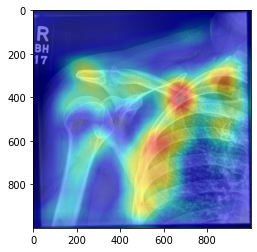

In [173]:
getHeatmap("shouldertest.png")

/var/folders/9b/vyr22bts0rqclv5wy45xy0lc0000gn/T/ipykernel_1302/772648939.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


torch.return_types.topk(
values=tensor([0.9992]),
indices=tensor([2]))


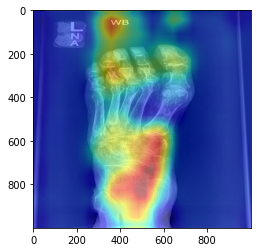

In [6]:
getHeatmap("foottest.png")

/var/folders/9b/vyr22bts0rqclv5wy45xy0lc0000gn/T/ipykernel_43478/772648939.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


torch.return_types.topk(
values=tensor([0.9999]),
indices=tensor([3]))


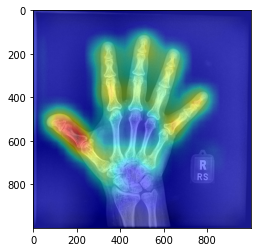

In [175]:
getHeatmap("handtest.png")

/var/folders/9b/vyr22bts0rqclv5wy45xy0lc0000gn/T/ipykernel_1302/772648939.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


torch.return_types.topk(
values=tensor([0.9998]),
indices=tensor([4]))


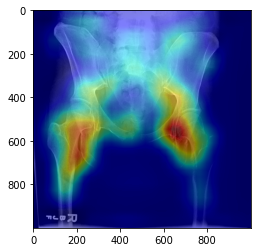

In [4]:
getHeatmap("hiptest.png")

/var/folders/9b/vyr22bts0rqclv5wy45xy0lc0000gn/T/ipykernel_43478/772648939.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


torch.return_types.topk(
values=tensor([0.8051]),
indices=tensor([5]))


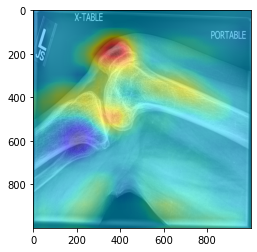

In [177]:
getHeatmap("kneetest.png")

/var/folders/9b/vyr22bts0rqclv5wy45xy0lc0000gn/T/ipykernel_1302/772648939.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


torch.return_types.topk(
values=tensor([1.0000]),
indices=tensor([8]))


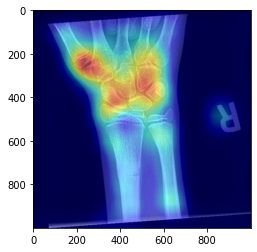

In [5]:
getHeatmap("wristtest.png")